# Graph Analyses

### Goals

1. identify all csv files, and open them.
1. Print all the graphs.
2. Upload Some peak finding algorithems, and test them.
3. write a function that will display all graphs, with the peaks from an arbitrary peak finding algorithem

### Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import subprocess

pd.set_option('display.max_columns', 10) # display columns
pd.set_option('display.max_rows', 8)    # display rows

#plot in the notebook
%matplotlib inline

#create ipython editable plot in sepperate window
#%matplotlib qt   

import matplotlib as mpl

## Read In Data And Plot

### Example: Read Data, Build Plot (With One File)

In [2]:
# Read in File Names
str_files  = subprocess.check_output(["ls | grep '\.csv$'"],shell=True).decode("utf-8")
list_files = str_files.split("\n")[:-1]
list_files

['sp001_051518_BaIrO3_916_295K_0.1atm_100-1200kHz.csv',
 'sp002_051518_BaIrO3_916_195K_100-1200kHz.csv',
 'sp003_051518_BaIrO3_916_194K_100-1200kHz.csv',
 'sp004_051518_BaIrO3_916_193K_100-1200kHz.csv',
 'sp005_051518_BaIrO3_916_192K_100-1200kHz.csv',
 'sp006_051518_BaIrO3_916_191K_100-1200kHz.csv',
 'sp007_051518_BaIrO3_916_190K_100-1200kHz.csv',
 'sp008_051518_BaIrO3_916_189K_100-1200kHz.csv',
 'sp009_051518_BaIrO3_916_188K_100-1200kHz.csv',
 'sp010_051518_BaIrO3_916_187K_100-1200kHz.csv',
 'sp011_051518_BaIrO3_916_185K_100-1200kHz.csv',
 'sp012_051518_BaIrO3_916_184K_100-1200kHz.csv',
 'sp013_051518_BaIrO3_916_183K_100-1200kHz.csv',
 'sp014_051518_BaIrO3_916_182K_100-1200kHz.csv',
 'sp015_051518_BaIrO3_916_181K_100-1200kHz.csv',
 'sp016_051518_BaIrO3_916_180K_100-1200kHz.csv',
 'sp017_051518_BaIrO3_916_179K_100-1200kHz.csv',
 'sp018_051518_BaIrO3_916_178K_100-1200kHz.csv',
 'sp019_051518_BaIrO3_916_177K_100-1200kHz.csv',
 'sp020_051518_BaIrO3_916_176K_100-1200kHz.csv',
 'sp021_05151

In [3]:
# Read In Data
read_file = list_files[1]
df = pd.read_csv(read_file)
print("File Read: ",read_file)

File Read:  sp002_051518_BaIrO3_916_195K_100-1200kHz.csv


In [4]:
# Display Data
df.head(10)

,"Frequency, Hz - Peaks",Magnitude (V) - Peaks,"Frequency, Hz - Signal",Magnitude (V) - Signal
0,129.9k,2.476297m,100k,729.632u
1,163.26k,1.406614m,100.02k,346.4334u
2,187.98k,3.072827m,100.04k,232.6887u
3,235.5k,1.928759m,100.06k,614.2753u
...,...,...,...,...
6,284.56k,2.041854m,100.12k,743.0403u
7,303.72k,2.103579m,100.14k,742.6972u
8,323.64k,6.908894m,100.16k,739.7663u
9,331.08k,2.128424m,100.18k,733.0368u


In [5]:
# Parse into peak and column Data

peak_headers   = list(df)[:2]
signal_headers = list(df)[2:]

df_peak    = df[peak_headers]
df_signal  = df[signal_headers]

# drop empty rows
df_peak   = df_peak.dropna(axis=0) 
df_signal = df_signal.dropna(axis=0) 

In [6]:
display(df_peak)
print(df_peak.dtypes,end="\n\n")
display(df_signal)
print(df_signal.dtypes,end="\n\n")

,"Frequency, Hz - Peaks",Magnitude (V) - Peaks
0,129.9k,2.476297m
1,163.26k,1.406614m
2,187.98k,3.072827m
3,235.5k,1.928759m
...,...,...
11,358.16k,8.995125m
12,366.26k,8.949304m
13,403.48k,1.251911m
14,973.6k,1.279613m


Frequency, Hz - Peaks    object
Magnitude (V) - Peaks    object
dtype: object



,"Frequency, Hz - Signal",Magnitude (V) - Signal
0,100k,729.632u
1,100.02k,346.4334u
2,100.04k,232.6887u
3,100.06k,614.2753u
...,...,...
54997,1.19994M,20.8403u
54998,1.19996M,20.34196u
54999,1.19998M,18.38601u
55000,1.2M,17.04597u


Frequency, Hz - Signal    object
Magnitude (V) - Signal    object
dtype: object



In [7]:
# Convert the data to floats
def convert(val):
    
    # conversion dictionary
    conversions = {
                    'n':10**-9,
                    'u':10**-6,
                    'm':10**-3,
                    'k':10**3,  
                    'M':10**6
                  }
    
    # get the last character in a value
    str_val   = str(val)
    last_char = str_val[-1]
    
    # convert last char it is in dictionary if it is in conversion list
    if last_char in conversions:
        val = float(str_val[:-1])*conversions[last_char]
    
    # implictely convert to float
    else:     
        try:
            val = float(val)
        except:
            print("Failed to Implicitely Convert to Float: ",val)
            return None
    
    return val
    

In [8]:
df_signal = df_signal.applymap(convert)
df_peak   = df_peak.applymap(convert)

In [9]:
print(df_peak.dtypes)
display(df_peak)

print(df_signal.dtypes)
display(df_signal)

Frequency, Hz - Peaks    float64
Magnitude (V) - Peaks    float64
dtype: object


,"Frequency, Hz - Peaks",Magnitude (V) - Peaks
0,129900.0,0.002476
1,163260.0,0.001407
2,187980.0,0.003073
3,235500.0,0.001929
...,...,...
11,358160.0,0.008995
12,366260.0,0.008949
13,403480.0,0.001252
14,973600.0,0.001280


Frequency, Hz - Signal    float64
Magnitude (V) - Signal    float64
dtype: object


,"Frequency, Hz - Signal",Magnitude (V) - Signal
0,100000.0,0.000730
1,100020.0,0.000346
2,100040.0,0.000233
3,100060.0,0.000614
...,...,...
54997,1199940.0,0.000021
54998,1199960.0,0.000020
54999,1199980.0,0.000018
55000,1200000.0,0.000017


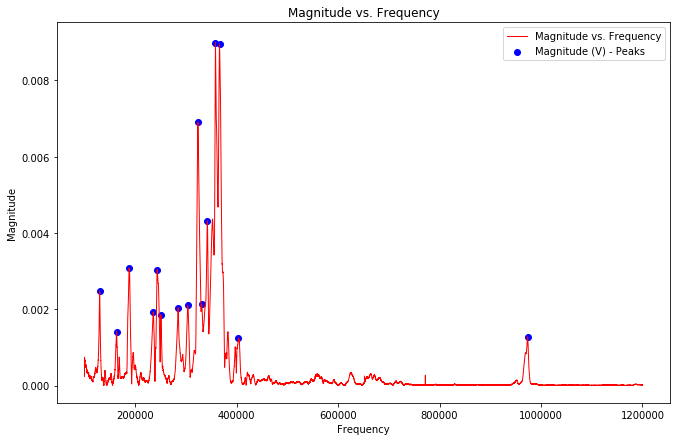

In [10]:
# Plot

%matplotlib inline

# set plot size
mpl.rcParams['figure.figsize'] = (11,7) 

# Signal Data
x = Frequency = df_signal[signal_headers[0]]
y = Magnitude = df_signal[signal_headers[1]]

# Signal Plot
plt.plot(x, y, 
         linewidth=1, linestyle="-",
         color="red", label="Magnitude vs. Frequency")

# Peak Data
x_peak = df_peak[peak_headers[0]]
y_peak = df_peak[peak_headers[1]]

# Peak Plot
plt.scatter(x_peak, y_peak, color='blue')



plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Magnitude vs. Frequency")
plt.legend(loc="upper right")

plt.show()

In [11]:
del x_peak, y_peak, x, y, df_peak, df_signal, peak_headers, signal_headers, df, list_files

### Read In all Data

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class Point_Click_Graph():
    """
    * Builds graphs with clickable points from given files, 
      and records the points that are clicked.
    
    * Only Applicable For:
            - Files that all have their data in the same column indices
            - All the columns in the file need to have their data convereted,
              using the same convert function
              
    * Make More Applicable:
            - This class can be made to be applicable for more general forms of data, 
              if some prepocessing is done on the files. In such a case, 
                  - The convert function may not need to do anything,
                  - And all of the columns in the file can be made to represent the appropriate data,
                    which would make this class appriopriate to use.
    """

    def __init__(self, file_names, signal_indices, point_indices, convert = None):
        """
        PARAMETERS:
            * :file_names: [Iterable] of   [Strings] All the files that will be analyzed
            * :signal/point indices: [Iterable] of 2 [Integers]:
                - [x_indice, y_indice]
                - each integer represents the indice in the csv file that corresponds
                  to x/y signal/point data.
            * convert: [function] The function that will be used to convert the values 
                                      in the files to integers
        """
        # provided data
        self.file_names = file_names
        self.signal_indices = signal_indices
        self.point_indices  = point_indices
        self.convert = convert
        
        # synthesized data
        self.signal_headers, self.point_headers = self._get_headers()
        self.dict_data = self._store_file_data()
        
        # useful synthesized data
        

    def _get_headers(self):
        '''
        RETURNS: 2-[Lists] of [Strings]
            * The headers, corresponding to the indices that were passed in.
        '''
        df = pd.read_csv(self.file_names[0])
        headers = list(df)
        signal_headers = [headers[self.signal_indices[0]]] + \
                         [headers[self.signal_indices[1]]]
        point_headers  = [headers[self.point_indices[0]]]  + \
                         [headers[self.point_indices[1]]]
            
        return signal_headers, point_headers
        
    def _store_file_data(self):
        '''
        DESCRIPTION:
            1. reads in all of the data, from all of the files
            2. parses all of the data
            3. splits the data into signal, and peak dataframes 
        RETURNS: [Dictionary]:
            - KEY:   [String] file_name
            - VALUE: [Tuple] of [dataframes] -> (signal-DataFrame, point-DataFrame)
        '''

        file_to_data = {}

        for read_file in self.file_names:

            # Read Data
            df = pd.read_csv(read_file)

            # Sepperate DataFrames
            df_signal  = df[self.signal_headers]
            df_peak    = df[self.point_headers]

            # Drop Empty Rows
            df_signal = df_signal.dropna(axis=0) 
            df_peak   = df_peak.dropna(axis=0) 

            # Convert Data to Floats
            if convert is not None:
                df_signal = df_signal.applymap(convert)
                df_peak   = df_peak.applymap(convert)

            # Store data in dictionary, with file key
            file_to_data[read_file] = (df_signal,df_peak)

        return file_to_data

    def _get_plot_data(self, file_name):
        '''
        RETURNS: [tuple] of [arrays]:
            - the data from a single file that can than be plotted.
        '''

        # Signal to Plot
        df_signal = self.dict_data[file_name][0]  
        x = df_signal[self.signal_headers[0]]
        y = df_signal[self.signal_headers[1]]

        # Points To Plot
        df_point = all_data[file_name][1]
        x_point  = df_point[self.point_headers[0]]
        y_point  = df_point[self.point_headers[1]]

        return x,y,x_point,y_point

    def make_plots(self):
        '''
        DESCRIPTION:
            - Plots the data from all of the files one at a time.
            - These plots have clickable peaks. Everytime, a click is made on 
              a peak, the position of the peak is recorded. If the peak is 
              clicked on again, it will remove the record of that peak.
        RETURN:
            - returns a dictionary:
                - KEY: name of the file
                - VALUES: [List] of [Tuples] (x-coordinate, y-coordinate)
                          that describes the peaks that were clicked on. 
                          (if a peak is clicked again, it will be removed from 
                          this list.)
        '''

        # Dictionary that is returned
        important_points = {} 

        for file_name in self.dict_data:

            important_points[file_name] = []
 
            #      --- Get Signal and Peak Data ---
            x, y, x_points, y_points = self._get_plot_data(file_name)
  

            #      --- Basic Plot Info ---
            mpl.rcParams['figure.figsize'] = (11,7) # Set Default Plot Size
            fig, ax = plt.subplots()                # Create Plot
            plt.ion()                               # Interactive mode on

            
            #      --- Make Plots --- 
            # Signal Plot
            ax.plot(x, y, linewidth=1, linestyle="-",
                     color="red", label="Magnitude vs. Frequency")
            
            # Point Plot
            coll = ax.scatter(x_points, y_points, color=["blue"]*len(x_points),picker=5,label="Point Data")
            
            
            #      --- Set Plot Parameters ---
            # Set Axes Info 
            ax.set_xlim(0,1200000)
            ax.set_ylim(0,np.max(y_points)+0.2*np.max(y_points))
            ax.set_xlabel("Frequency")
            ax.set_ylabel("Magnitude")
            ax.set_title(file_name)
            ax.legend(loc="upper right")

            print("File:",file_name)
            
            
            #      --- Clickable Event ---
            def on_pick(event):

                # index of the array, were the event occurred
                ind = event.ind[0]

                # where the event ocurred
                x_val, y_val = x_points[ind], y_points[ind]

                # add point
                if [x_val,y_val] not in important_points[file_name]:

                    # color is speciified by: RGBA tuple
                    # https://www.cgl.ucsf.edu/chimera/docs/ProgrammersGuide/Examples/footnotes/rgba.html
                    important_points[file_name].append([x_val,y_val])
                    coll._facecolors[ind,:] = (1, 0, 0, 1)
                    coll._edgecolors[ind,:] = (1, 0, 0, 1)
                    print("\t  Picked  Point [ {:>3} ] at: [ {:06.2f}, {:06.5f} ]".format(ind,x_val,y_val))

                # remove point
                else:

                    important_points[file_name].remove([x_val,y_val])
                    coll._facecolors[ind,:] = (0, 0, 1, 1)
                    coll._edgecolors[ind,:] = (0, 0, 1, 1)
                    print("\t  Removed Point [ {:>3} ] at point: [ {:06.2f}, {:06.5f} ]".format(ind,x_val,y_val))

                fig.canvas.draw()

            fig.canvas.mpl_connect('pick_event', on_pick)

            # Add blocking to stop the program until graphs are built
            plt.show(block=True)

        return important_points

        
        

In [41]:
def convert(val):
    '''
    DESCRIPTION:
        - converts a string into a float.
        - You can use pandas to run this function over specific columns
          in your data, using, "df.apply_map(func)"
        - This is a helper function for store_file_data
    '''
    
    # conversion dictionary
    conversions = {
                    'n':10**-9,
                    'u':10**-6,
                    'm':10**-3,
                    'k':10**3,  
                    'M':10**6
                  }
    
    # get the last character in a value
    str_val   = str(val)
    last_char = str_val[-1]
    
    # convert last char it is in dictionary if it is in conversion list
    if last_char in conversions:
        val = float(str_val[:-1])*conversions[last_char]
    
    # implictely convert to float
    else:     
        try:
            val = float(val)
        except:
            print("Failed to Implicitely Convert to Float: ",val)
            return None
    
    return val

#       --- Get Data ---
%matplotlib qt
all_files = get_files()
signal_headers, peak_headers = get_headers(all_files[0],2,3,0,1)
all_data  = store_file_data(all_files,signal_headers,peak_headers)

#       --- Make Plots ---
#important_peaks = make_plots(all_data,signal_headers,peak_headers)
signal_indices = [2,3]
point_indices = [0,1]
pcg = Point_Click_Graph(all_files, signal_indices, point_indices, convert = convert)

#print(important_peaks)


In [43]:
%matplotlib qt
important_points = pcg.make_plots()

File: sp001_051518_BaIrO3_916_295K_0.1atm_100-1200kHz.csv
	  Picked  Point [  11 ] at: [ 326500.00, 0.00813 ]
	  Picked  Point [   9 ] at: [ 266340.00, 0.00126 ]
	  Removed Point [   9 ] at point: [ 266340.00, 0.00126 ]
	  Removed Point [  11 ] at point: [ 326500.00, 0.00813 ]
File: sp002_051518_BaIrO3_916_195K_100-1200kHz.csv
	  Picked  Point [  11 ] at: [ 358160.00, 0.00900 ]
	  Removed Point [  11 ] at point: [ 358160.00, 0.00900 ]
	  Picked  Point [  11 ] at: [ 358160.00, 0.00900 ]
	  Removed Point [  11 ] at point: [ 358160.00, 0.00900 ]
	  Picked  Point [  12 ] at: [ 366260.00, 0.00895 ]
	  Picked  Point [  11 ] at: [ 358160.00, 0.00900 ]
	  Picked  Point [  14 ] at: [ 973600.00, 0.00128 ]
File: sp003_051518_BaIrO3_916_194K_100-1200kHz.csv
File: sp004_051518_BaIrO3_916_193K_100-1200kHz.csv
File: sp005_051518_BaIrO3_916_192K_100-1200kHz.csv
File: sp006_051518_BaIrO3_916_191K_100-1200kHz.csv
File: sp007_051518_BaIrO3_916_190K_100-1200kHz.csv
File: sp008_051518_BaIrO3_916_189K_100-1

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import subprocess

#       --- Get/Clean Data  ---

def get_files(directory='.'):
    '''
    Returns: 
        - list of csv files from a given directory
    Parameters:
        - Directory: specifies the directory with the files you would like to analyze.
            - By Defualt: this method will use the current directory.
    '''
    
    # use shell command to get a string representation of all the csv files
    str_files  = subprocess.check_output(["ls "+directory+" | grep '\.csv$'"],shell=True).decode("utf-8")
    list_files = str_files.split("\n")
    
    # remove empty list elements
    while '' in list_files: list_files.remove('')  
        
    return list_files

def get_headers(file_name, signal_x_ind, signal_y_ind, peak_x_ind, peak_y_ind):
    '''
    PARAMETERS:
        - pass in a file, and the indices of the repective data
    RETURNS:
        - signal and peak labels for the data being used
    '''
    df = pd.read_csv(file_name)
    headers = list(df)
    
    signal_headers = [headers[signal_x_ind]] + [headers[signal_y_ind]]
    peak_headers   = [headers[peak_x_ind]]   + [headers[peak_y_ind]]

    return signal_headers, peak_headers

def convert(val):
    '''
    DESCRIPTION:
        - converts a string into a float.
        - You can use pandas to run this function over specific columns
          in your data, using, "df.apply_map(func)"
        - This is a helper function for store_file_data
    '''
    
    # conversion dictionary
    conversions = {
                    'n':10**-9,
                    'u':10**-6,
                    'm':10**-3,
                    'k':10**3,  
                    'M':10**6
                  }
    
    # get the last character in a value
    str_val   = str(val)
    last_char = str_val[-1]
    
    # convert last char it is in dictionary if it is in conversion list
    if last_char in conversions:
        val = float(str_val[:-1])*conversions[last_char]
    
    # implictely convert to float
    else:     
        try:
            val = float(val)
        except:
            print("Failed to Implicitely Convert to Float: ",val)
            return None
    
    return val

def store_file_data(file_names,signal_headers,peak_headers):
    '''
    DESCRIPTION:
        1. reads in all of the data, from all of the files
        2. parses all of the data
        3. splits the data into signal, and peak data, 
           that are stored in dataframes.
    RETURNS: dictionary:
        - KEY:   file_name
        - VALUE: (signal-DataFrame, peak-DataFrame)
    '''
    
    file_to_data = {}
    
    for read_file in file_names:
        
        # Read Data
        df = pd.read_csv(read_file)
           
        # Sepperate DataFrames
        df_signal  = df[signal_headers]
        df_peak    = df[peak_headers]
       
        # Drop Empty Rows
        df_signal = df_signal.dropna(axis=0) 
        df_peak   = df_peak.dropna(axis=0) 
        
        # Convert Data to Floats
        df_signal = df_signal.applymap(convert)
        df_peak = df_peak.applymap(convert)
        
        file_to_data[read_file] = (df_signal,df_peak)
    
    return file_to_data

def get_plot_data(file_name, all_data, signal_headers, peak_headers):
    '''
    RETURNS
        - the data from a single file that can than be plotted as 
          a tuple of arrays.
    '''

    # Signal to Plot
    df_signal = all_data[file_name][0]  
    x = df_signal[signal_headers[0]]
    y = df_signal[signal_headers[1]]
    
    # Peaks To Plot
    df_peak = all_data[file_name][1]
    x_peak  = df_peak[peak_headers[0]]
    y_peak  = df_peak[peak_headers[1]]
    
    return x,y,x_peak,y_peak

#       --- Build Graphs ---

def make_plots(all_data,signal_headers,peak_headers):
    '''
    DESCRIPTION:
        - Plots the data from all of the files one at a time.
        - These plots have clickable peaks. Everytime, a click is made on 
          a peak, the position of the peak is recorded. If the peak is 
          clicked on again, it will remove the record of that peak.
    RETURN:
        - returns a dictionary:
            - KEY: name of the file
            - VALUES: List of Tuples (x-coordinate, y-coordinate)
                      that describes the peaks that were clicked on. 
                      (if a peak is clicked again, it will be removed from 
                      this list.)
    '''
    
    important_peaks = {}

    for file_name in all_data:

        important_peaks[file_name] = []

        #      --- Get Signal and Peak Data ---
        x, y, x_peak, y_peak = get_plot_data(file_name,all_data,signal_headers,peak_headers)
        
        
        #      --- Set Plot Meta Data ---
        # Set Plot Size
        mpl.rcParams['figure.figsize'] = (11,7) 

        # Create Plot
        fig, ax = plt.subplots()

        # Set Axes Info 
        ax.set_xlim(0,1200000)
        ax.set_ylim(0,np.max(y_peak)+0.2*np.max(y_peak))
        ax.set_xlabel("Frequency")
        ax.set_ylabel("Magnitude")
        ax.set_title(file_name)

        #      --- Make Plots ---
        # Peak Plot
        coll = ax.scatter(x_peak, y_peak, color=["blue"]*len(x_peak),picker=5,label="Peak Data")

        # Signal Plot
        ax.plot(x, y, linewidth=1, linestyle="-",
                 color="red", label="Magnitude vs. Frequency")

        ax.legend(loc="upper right")
        
        #      --- Clickable Event ---
        print("File:",file_name)
        def on_pick(event):
            
            # index of the array, were the event occurred
            ind = event.ind[0]
            
            # where the event ocurred
            x_val = x_peak[ind]
            y_val = y_peak[ind]
            
            # add point
            if [x_val,y_val] not in important_peaks[file_name]:
            
                # color is speciified by: RGBA tuple
                # https://www.cgl.ucsf.edu/chimera/docs/ProgrammersGuide/Examples/footnotes/rgba.html
                important_peaks[file_name].append([x_val,y_val])
                coll._facecolors[ind,:] = (1, 0, 0, 1)
                coll._edgecolors[ind,:] = (1, 0, 0, 1)

                print("\t  Picked  Peak [ {:>3} ] at point: [ {:06.2f}, {:06.5f} ]".format(ind,x_val,y_val))
            
            # remove point
            else:
                
                important_peaks[file_name].remove([x_val,y_val])
                coll._facecolors[ind,:] = (0, 0, 1, 1)
                coll._edgecolors[ind,:] = (0, 0, 1, 1)

                print("\t  Removed Peak [ {:>3} ] at point: [ {:06.2f}, {:06.5f} ]".format(ind,x_val,y_val))
            
            fig.canvas.draw()

        fig.canvas.mpl_connect('pick_event', on_pick)

        # Add blocking to stop the program until graphs are built
        plt.show(block=True)

    return important_peaks

# 	--- Main Method  ---

def main():
    pass
#     #       --- Get Data ---
#     all_files = get_files()
#     signal_headers, peak_headers = get_headers(all_files[0],2,3,0,1)
#     all_data  = store_file_data(all_files,signal_headers,peak_headers)
    
#     #       --- Make Plots ---
#     important_peaks = make_plots(all_data,signal_headers,peak_headers)
    

if __name__ == "__main__":
    main()




In [17]:
#       --- Get Data ---
%matplotlib qt
all_files = get_files()
signal_headers, peak_headers = get_headers(all_files[0],2,3,0,1)
all_data  = store_file_data(all_files,signal_headers,peak_headers)

#       --- Make Plots ---
important_peaks = make_plots(all_data,signal_headers,peak_headers)

#print(important_peaks)




File: sp001_051518_BaIrO3_916_295K_0.1atm_100-1200kHz.csv
	  Picked  Peak [  11 ] at point: [ 326500.00, 0.00813 ]
	  Picked  Peak [   9 ] at point: [ 266340.00, 0.00126 ]
File: sp002_051518_BaIrO3_916_195K_100-1200kHz.csv
	  Picked  Peak [  11 ] at point: [ 358160.00, 0.00900 ]
	  Picked  Peak [  12 ] at point: [ 366260.00, 0.00895 ]
	  Picked  Peak [   8 ] at point: [ 323640.00, 0.00691 ]
File: sp003_051518_BaIrO3_916_194K_100-1200kHz.csv
File: sp004_051518_BaIrO3_916_193K_100-1200kHz.csv
File: sp005_051518_BaIrO3_916_192K_100-1200kHz.csv
File: sp006_051518_BaIrO3_916_191K_100-1200kHz.csv
File: sp007_051518_BaIrO3_916_190K_100-1200kHz.csv
File: sp008_051518_BaIrO3_916_189K_100-1200kHz.csv
File: sp009_051518_BaIrO3_916_188K_100-1200kHz.csv
File: sp010_051518_BaIrO3_916_187K_100-1200kHz.csv
File: sp011_051518_BaIrO3_916_185K_100-1200kHz.csv
File: sp012_051518_BaIrO3_916_184K_100-1200kHz.csv
File: sp013_051518_BaIrO3_916_183K_100-1200kHz.csv
File: sp014_051518_BaIrO3_916_182K_100-1200kH

In [15]:
#       --- Total Plot  ---
%matplotlib qt

Freq = []
Temp  = []
for file_name in important_peaks:
    for peak in important_peaks[file_name]:
        Freq.append(peak[0])
        Temp.append(float(file_name.split('_')[4][:-1]))

#print("Frequency:\n",Freq)
#print("Temperature:\n",Temp)


#mpl.rc('text', usetex=True)
#mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

fig = plt.figure()

plt.plot(Temp,Freq,"o", 
         markeredgewidth=2,markeredgecolor='b',
         markerfacecolor='None',
         label="Frequency vs Temp"
        )

plt.xlabel("Temperature [K]",fontsize=15)
plt.ylabel("Freq [kHz]",fontsize=15)
plt.title("$BalrO_{3}$ ba916 5/15/18",fontsize=20)
plt.grid(True)

plt.show()
    

In [90]:
%matplotlib inline
def make_plot(x,y,**plot_data):
    
    plt.plot(x,y,label="cool stuff")
    
    plt.xlabel(plot_data["xlabel"])
    plt.ylabel(plot_data["ylabel"])
    plt.title("a vs. b")
    plt.legend()
    
    plt.show()

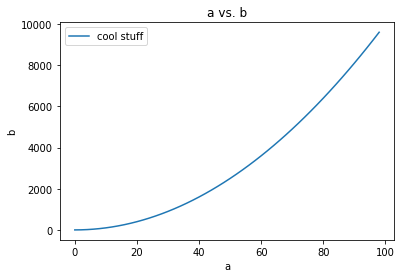

In [91]:
x = np.arange(0,100,2)
y = x**2
plot_desc = {
                "xlabel":"a",
                "ylabel":"b",
                "title" :"a vs b",
            }
make_plot(x,y, **plot_desc)

In [59]:
plt.plot([1,2,3],[1,2,3])
plt.show()